In [1]:
library(data.table)
library(ggplot2)
library(dplyr)
library(viridis)
options(scipen=999)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: viridisLite


In [2]:
all_anon_edits <- read.table("../../results/misalignment_edit_types_tables_and_queries/gradient_boosting_threshold_scores_I2_for_anonymous_user_sessions.tsv", header=TRUE, sep="\t")

In [3]:
all_anon_edits$year = substr(all_anon_edits$session_start, 1, 4)
all_anon_edits$month = substr(all_anon_edits$session_start, 5, 6)
all_anon_edits$log_session_length_in_seconds = log(all_anon_edits$session_length_in_seconds)

In [4]:

# all_anon_edits_ordered_by_year_month$month_order = 1:110288
all_anon_edits$group = "All Sessions"

max_all_anon_edits = filter(group_by(all_anon_edits, year, month), session_length_in_seconds == max(session_length_in_seconds))
max_all_anon_edits_ordered_by_year_month = max_all_anon_edits[order(max_all_anon_edits$year, max_all_anon_edits$month),]
max_all_anon_edits_ordered_by_year_month$month_order = 1:56


non_bot_anon_edits = all_anon_edits[all_anon_edits$threshold_score < -1.18,]
non_bot_anon_edits$group = "Non-bot Only Sessions"
max_non_bot_anon_edits = filter(group_by(non_bot_anon_edits, year, month), session_length_in_seconds == max(session_length_in_seconds))
max_non_bot_anon_edits_ordered_by_year_month = max_non_bot_anon_edits[order(max_non_bot_anon_edits$year, max_non_bot_anon_edits$month),]

# Bit more work since 4 months do not have anon bot edits
max_non_bot_anon_edits_ordered_by_year_month$month_order = 1:56
        
# head(max_non_bot_anon_edits_ordered_by_year_month, n=60)                                                         
                                                          
                                                          

combined_final_table = rbind(max_all_anon_edits_ordered_by_year_month[2:55,], max_non_bot_anon_edits_ordered_by_year_month[2:55,])
combined_final_table$group = factor(combined_final_table$group)

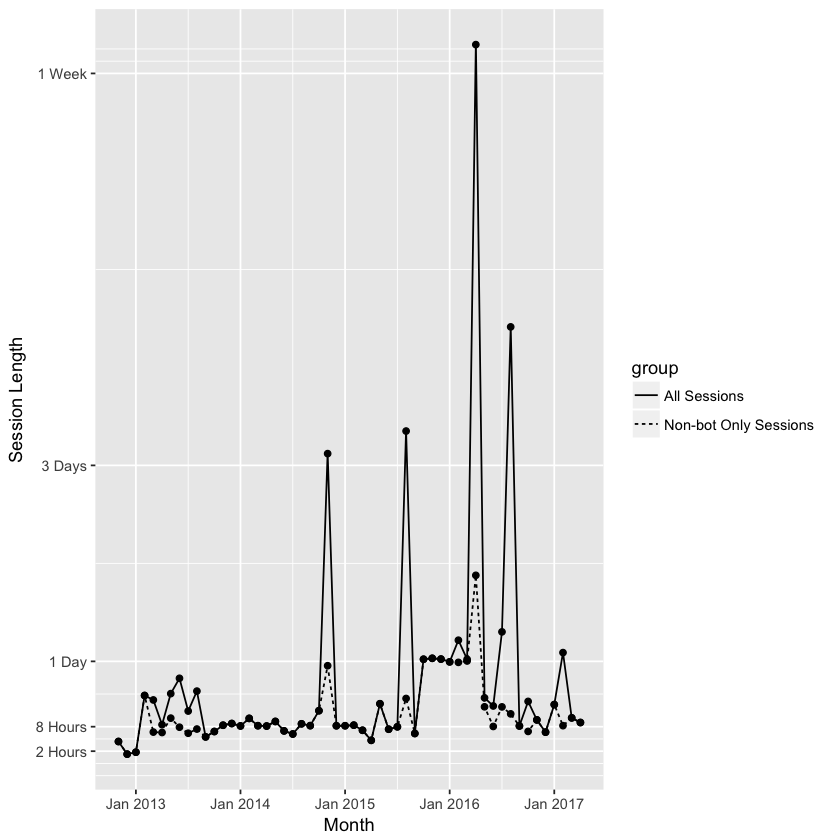

In [5]:
ggplot(combined_final_table,
       aes(x=month_order, y=session_length_in_seconds,  linetype=group)) + geom_point() + geom_line() +
scale_y_continuous(breaks=(c(60*60*2, 60*60*8, 60*60*24, 60*60*24*3, 60*60*24*7)),labels=c("2 Hours", "8 Hours", "1 Day", "3 Days", "1 Week")) +
scale_x_continuous(breaks=(c(4,16,28, 40, 52)),labels=c("Jan 2013", "Jan 2014", "Jan 2015", "Jan 2016", "Jan 2017")) +
ylab("Session Length") +
xlab("Month")
